In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-user-analysis/instagram_usage_lifestyle.csv
/kaggle/input/social-media-user-analysis/instagram_users_lifestyle.csv


# Exploratory Data Analysis (EDA)
## Social Media User Behavior, Lifestyle, and Engagement

This notebook explores a large-scale dataset containing **1.54 million users** and **58 variables**, covering:

- Demographics
- Lifestyle & health indicators
- Digital behavior on Instagram
- Privacy, security, and monetization choices
- A synthesized user engagement score

The goal of this EDA is not only to describe the data, but to **uncover behavioral patterns** and **raise deeper analytical questions**.


## 1. Import Required Libraries

We begin by importing the essential Python libraries used for:
- Data manipulation
- Numerical computation
- Visualization

All analysis is performed using widely adopted, production-grade tools.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

## 2. Loading the Dataset

The dataset contains over **1.5 million users** and **58 features**, capturing:
- Demographics
- App usage behavior
- Privacy & security settings
- Engagement metrics

Due to its size, we avoid unnecessary copying or expensive operations.


In [3]:
df = pd.read_csv("/kaggle/input/social-media-user-analysis/instagram_usage_lifestyle.csv")
df

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547891,1547892,Instagram,61,Female,United States,Suburban,High,Full-time employed,Master’s,Widowed,...,2025-01-14,15.8,Videos,Other,Friends only,Yes,Yes,4,Free,0.97
1547892,1547893,Instagram,42,Male,United States,Urban,Lower-middle,Full-time employed,Master’s,Divorced,...,2025-08-04,38.0,Photos,Art,Private,No,No,1,Premium,1.32
1547893,1547894,Instagram,32,Male,Canada,Urban,Low,Full-time employed,Master’s,Single,...,2025-04-10,31.8,Live,Other,Private,Yes,Yes,5,Free,1.01
1547894,1547895,Instagram,14,Female,Other,Urban,Low,Student,Bachelor’s,Single,...,2025-03-21,23.6,Live,Tech,Private,Yes,No,3,Free,1.11


## 3. Dataset Overview

We begin by examining:
- Dataset size
- Data types
- Memory footprint

This helps guide which analyses are feasible at scale.


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

### Initial Observations

- No missing values across any column
- A healthy mix of:
  - Numerical features (usage intensity, health metrics)
  - Categorical features (demographics, preferences)
- Dataset is **analysis-ready**, requiring no immediate cleaning

## 3. Feature Grouping and Semantic Structure

To reason effectively, we group the 58 variables conceptually:

### Demographics
- age, gender, country, urban_rural
- income_level, education_level, employment_status
- relationship_status, has_children

### Lifestyle & Health
- exercise_hours_per_week, sleep_hours_per_night
- diet_quality, smoking, alcohol_frequency
- BMI, blood pressure, daily steps
- perceived_stress_score, self_reported_happiness

### Productivity & Social Life
- weekly_work_hours, hobbies_count
- books_read_per_year, volunteer_hours_per_month
- social_events_per_month, travel_frequency_per_year

### Instagram Usage Behavior
- daily_active_minutes_instagram
- sessions_per_day
- posts, reels, stories, likes, comments, DMs
- ads viewed & clicked
- time spent on different app surfaces

### Network & Account Characteristics
- followers_count, following_count
- account_creation_year, last_login_date

### Privacy, Security & Monetization
- privacy_setting_level
- two_factor_auth_enabled, biometric_login_used
- linked_accounts_count
- uses_premium_features, subscription_status

### Target Variable
- user_engagement_score


## 4. Demographic Distributions

Understanding *who* the users are is foundational before studying *how* they behave.


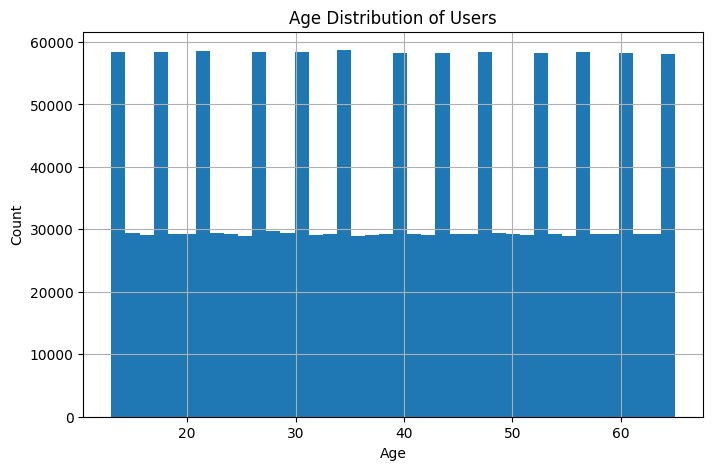

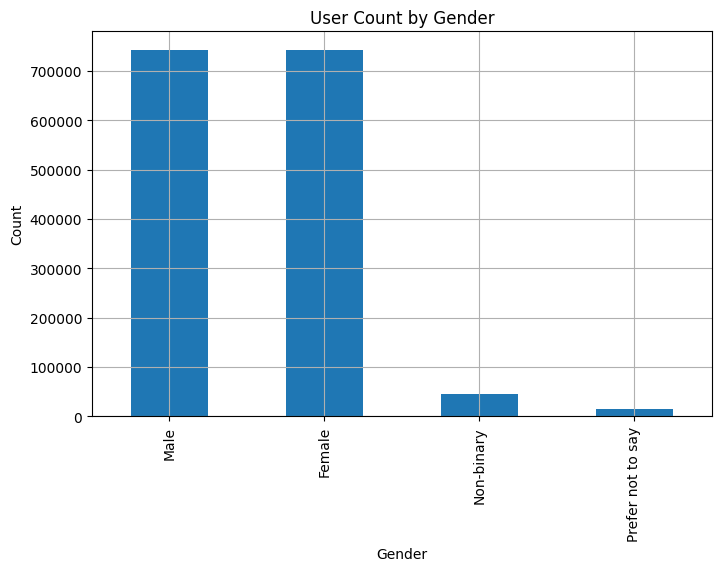

In [5]:
df["age"].hist(bins=40)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

df["gender"].value_counts()
df["gender"].value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("User Count by Gender")
plt.show()


### Insights

- Wide age coverage → platform spans generations
- Explicit representation beyond binary gender
- Enables fairness-aware downstream analysis


## 5. Lifestyle and Health Indicators

These variables allow us to examine whether **offline life patterns**
correlate with **digital engagement**.


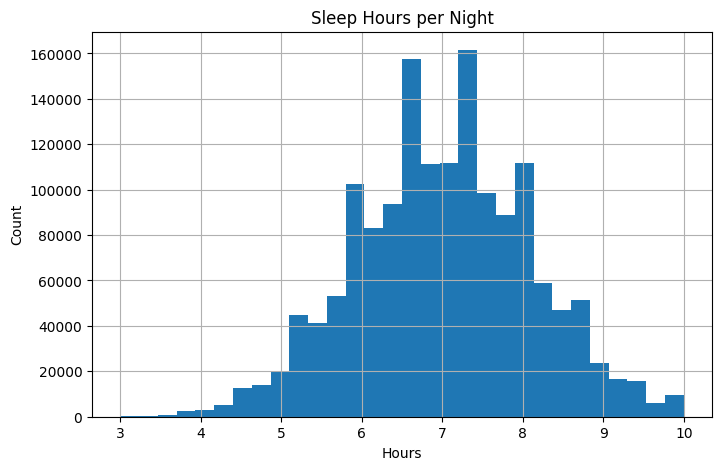

count    1.547896e+06
mean     1.998774e+01
std      1.183258e+01
min      0.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      3.000000e+01
max      4.000000e+01
Name: perceived_stress_score, dtype: float64

In [6]:
df["sleep_hours_per_night"].hist(bins=30)
plt.title("Sleep Hours per Night")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

df["perceived_stress_score"].describe()


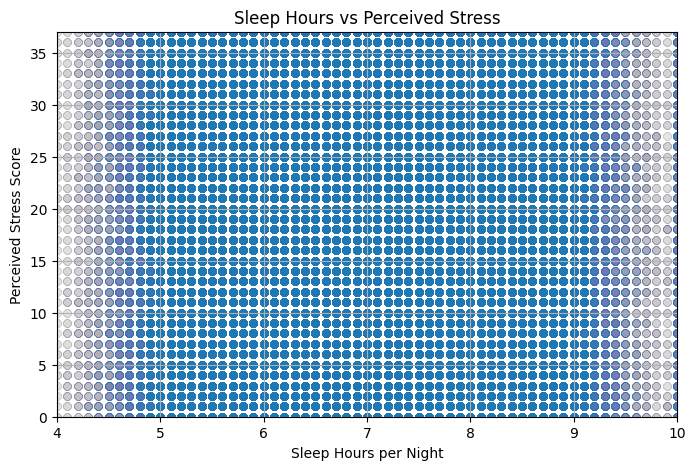

In [7]:
plt.scatter(
    df["sleep_hours_per_night"],
    df["perceived_stress_score"],
    alpha=0.003,
)
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Perceived Stress Score")
plt.title("Sleep Hours vs Perceived Stress")

plt.xlim(4, 10)
plt.ylim(0, 37)
plt.show()


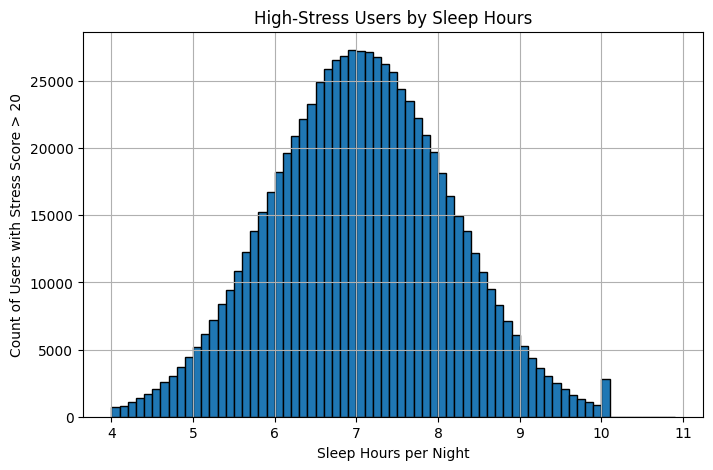

In [8]:
high_stress = df[df["perceived_stress_score"] > 20]
bins = np.arange(4, 11, 0.1)  # 4–10 hours, 0.5 hour bins
high_stress["sleep_hours_per_night"].hist(
    bins=bins,
    edgecolor="black"
)
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Count of Users with Stress Score > 20")
plt.title("High-Stress Users by Sleep Hours")
plt.show()


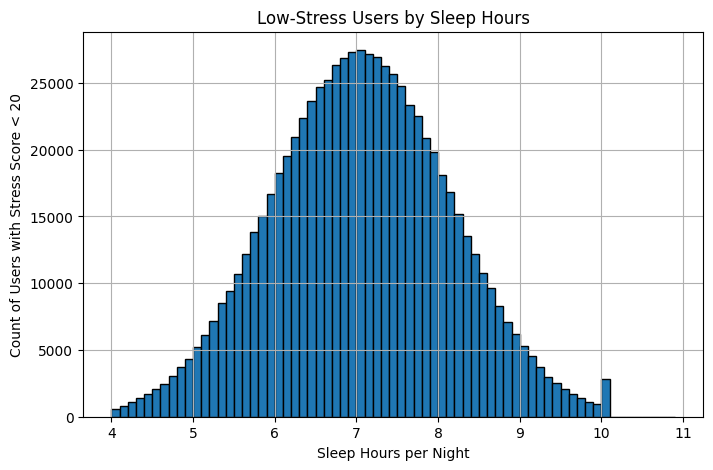

In [9]:
low_stress = df[df["perceived_stress_score"] < 20]
bins = np.arange(4, 11, 0.1)  # 4–10 hours, 0.5 hour bins
low_stress["sleep_hours_per_night"].hist(
    bins=bins,
    edgecolor="black"
)
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Count of Users with Stress Score < 20")
plt.title("Low-Stress Users by Sleep Hours")
plt.show()


In [10]:
#Group by sleep hours and calculate mean perceived stress
avg_stress_by_sleep = df.groupby("sleep_hours_per_night")["perceived_stress_score"].mean()
#avg_stress_by_sleep.plot(kind="bar")
#plt.xlabel("Sleep Hours per Night")
#plt.ylabel("Average Perceived Stress Score")
#plt.title("Average Stress by Sleep Hours")
#plt.show()


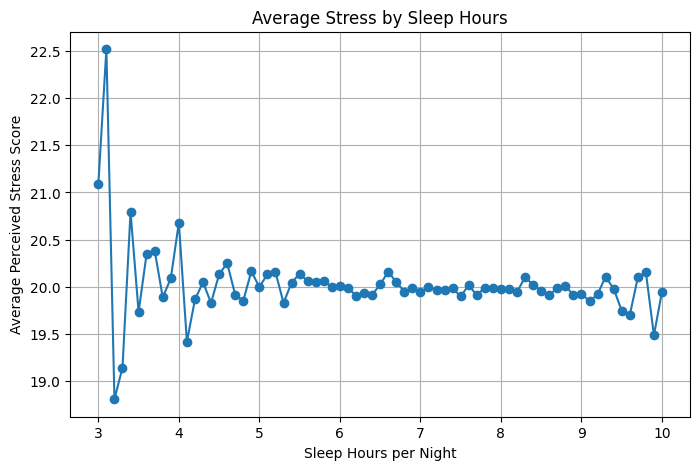

In [11]:
avg_stress_by_sleep.plot(kind="line", marker='o')
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Average Perceived Stress Score")
plt.title("Average Stress by Sleep Hours")
plt.grid(True)
plt.show()


### Interpretation

- Sleep and stress show natural variability
- These features open the door to **behavioral well-being analysis**
  rather than pure usage analytics


## 6. Instagram Usage Intensity

We now examine how actively users interact with the platform.


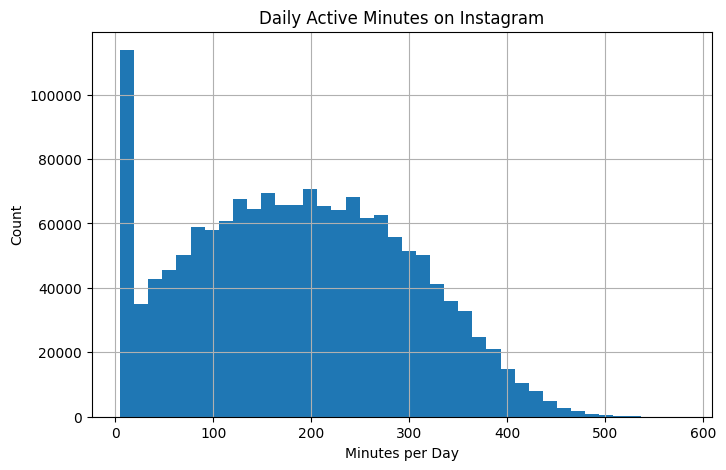

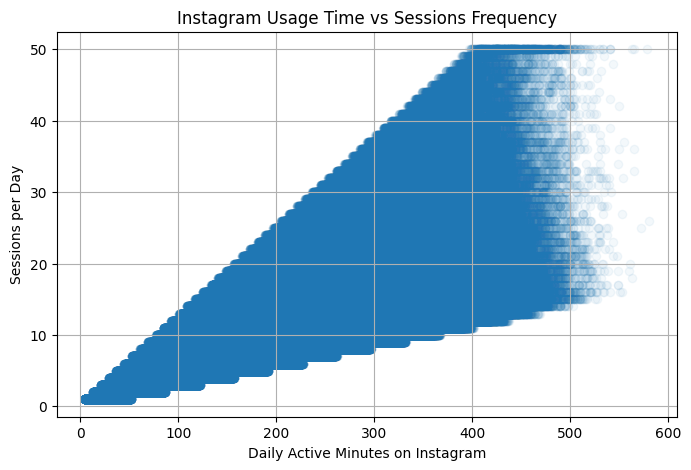

In [12]:
df["daily_active_minutes_instagram"].hist(bins=40)
plt.title("Daily Active Minutes on Instagram")
plt.xlabel("Minutes per Day")
plt.ylabel("Count")
plt.show()

df["sessions_per_day"].describe()
plt.scatter(
    df["daily_active_minutes_instagram"],
    df["sessions_per_day"],
    alpha=0.05
)
plt.xlabel("Daily Active Minutes on Instagram")
plt.ylabel("Sessions per Day")
plt.title("Instagram Usage Time vs Sessions Frequency")
plt.show()

### Observations

- Most users have moderate daily activity
- A smaller subset exhibits very high usage
- Suggests **distinct user archetypes**


## 7. Content Type & Theme Preferences

Content preference strongly shapes engagement and retention.


In [13]:
df["content_type_preference"].value_counts()

content_type_preference
Reels      258594
Stories    258499
Mixed      258363
Live       257609
Photos     257430
Videos     257401
Name: count, dtype: int64

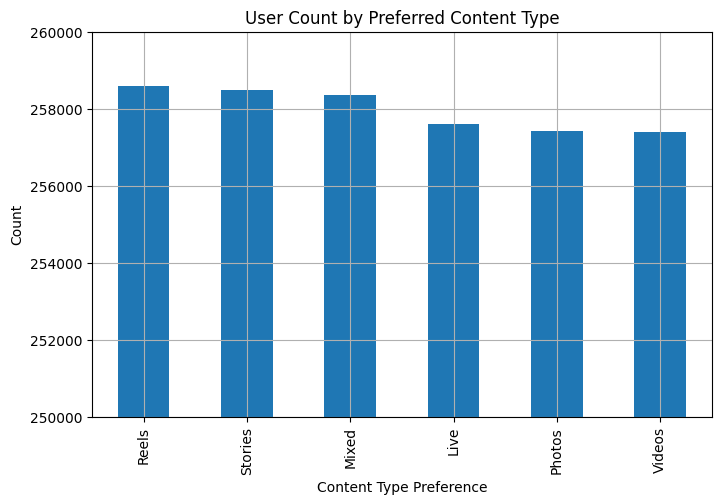

In [14]:
df["content_type_preference"].value_counts().plot(kind="bar")
plt.ylim(250000, 260000)
plt.xlabel("Content Type Preference")
plt.ylabel("Count")
plt.title("User Count by Preferred Content Type")
plt.show()

In [15]:

df["preferred_content_theme"].value_counts().head(10)

preferred_content_theme
Fitness    194543
Tech       193712
Other      193609
Food       193583
Fashion    193464
Music      193464
Art        192991
Travel     192530
Name: count, dtype: int64

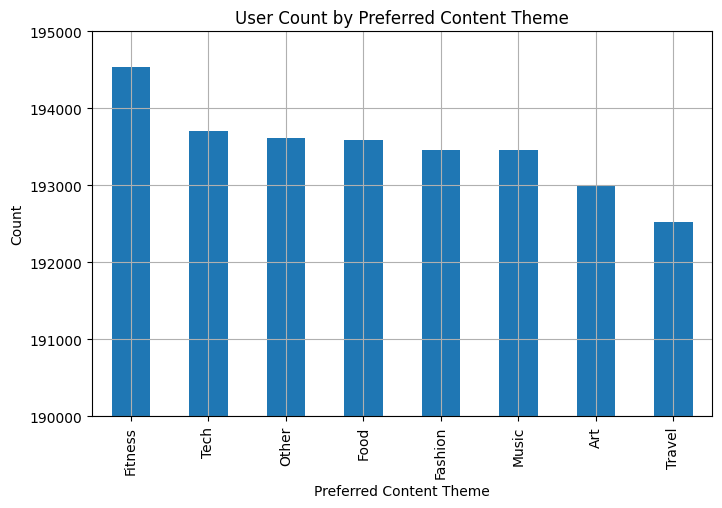

In [16]:

df["preferred_content_theme"].value_counts().plot(kind="bar")
plt.ylim(190000, 195000)
plt.xlabel("Preferred Content Theme")
plt.ylabel("Count")
plt.title("User Count by Preferred Content Theme")
plt.show()


### Interpretation

- Users diversify across formats (Reels, Stories, Feed)
- Themes like Tech, Music, Art, and Lifestyle dominate
- Personalization is central to engagement dynamics


## 8. Privacy and Security Choices

Privacy-related decisions often reflect trust, awareness, and risk tolerance.


In [17]:
df["privacy_setting_level"].value_counts(normalize=True) * 100


privacy_setting_level
Public          33.350755
Private         33.325043
Friends only    33.324203
Name: proportion, dtype: float64

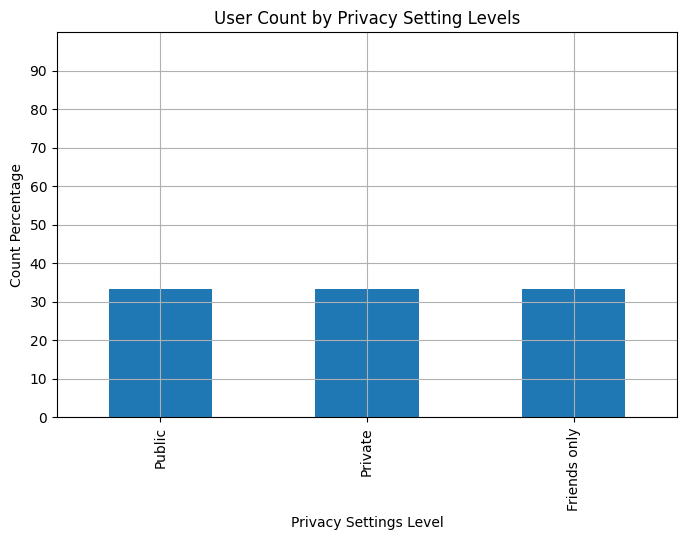

In [18]:
(df["privacy_setting_level"].value_counts(normalize=True) * 100).plot(kind="bar")
plt.ylim(0, 100)
plt.xlabel("Privacy Settings Level")
plt.ylabel("Count Percentage")
plt.title("User Count by Privacy Setting Levels")
plt.yticks(np.arange(0, 100, 10))
plt.show()


In [19]:

df["two_factor_auth_enabled"].value_counts(normalize=True) * 100

two_factor_auth_enabled
Yes    65.060056
No     34.939944
Name: proportion, dtype: float64

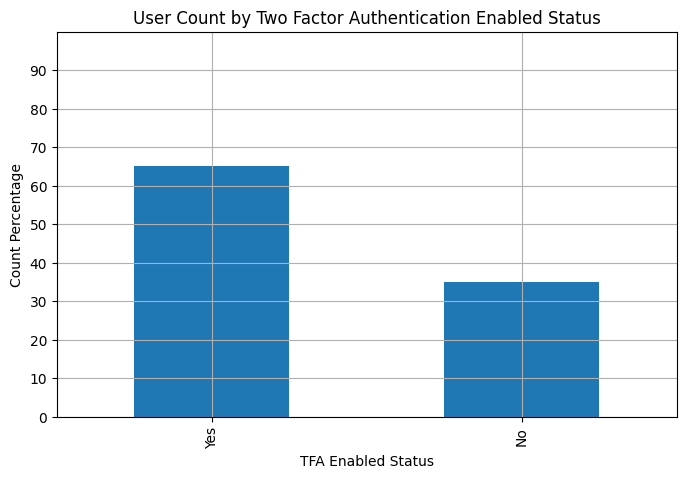

In [20]:

(df["two_factor_auth_enabled"].value_counts(normalize=True) * 100).plot(kind="bar")
plt.ylim(0, 100)
plt.xlabel("TFA Enabled Status")
plt.ylabel("Count Percentage")
plt.title("User Count by Two Factor Authentication Enabled Status")
plt.yticks(np.arange(0, 100, 10))
plt.show()


### Insights

- A significant fraction of users prioritize security
- Privacy settings vary widely, hinting at behavioral segmentation


## 9. User Engagement Score

The engagement score summarizes user interaction intensity and quality.
Understanding its distribution is critical.


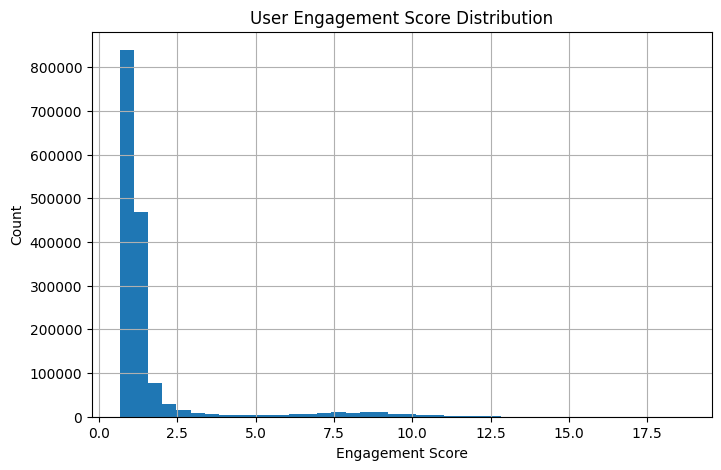

In [21]:
df["user_engagement_score"].hist(bins=40)
plt.title("User Engagement Score Distribution")
plt.xlabel("Engagement Score")
plt.ylabel("Count")
plt.show()


### Observation

- Right-skewed distribution
- Majority of users are lightly engaged
- A small minority drives disproportionate activity


## 10. Engagement vs Behavioral Variables

We begin relating engagement to observable actions.


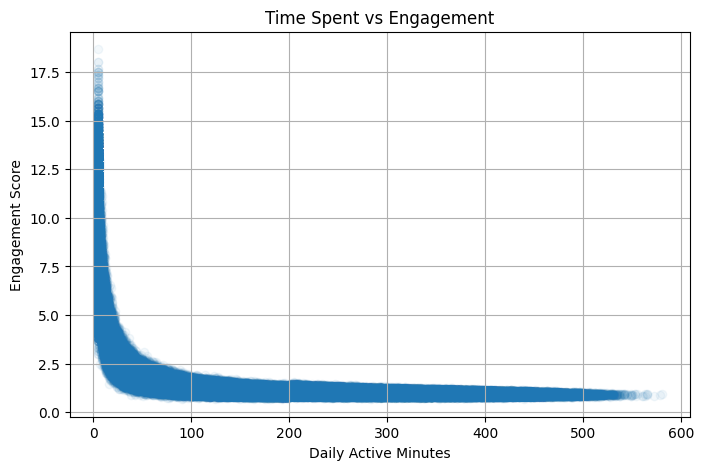

In [22]:
plt.scatter(
    df["daily_active_minutes_instagram"],
    df["user_engagement_score"],
    alpha=0.05
)
plt.xlabel("Daily Active Minutes")
plt.ylabel("Engagement Score")
plt.title("Time Spent vs Engagement")
plt.show()


### Interpretation

- Time spent is not linearly related to engagement
- Suggests engagement is **qualitative**, not just quantitative


## 11. Subscription Status and Engagement

Do paying users behave fundamentally differently?


In [23]:
df.groupby("subscription_status")["user_engagement_score"].mean()


subscription_status
Business    1.647167
Free        1.644063
Premium     1.645845
Name: user_engagement_score, dtype: float64

### Insight

- Premium users are not dramatically more engaged
- Monetization likely depends on **feature value**, not usage addiction


## 12. Multidimensional Patterns (Pre-Modeling)

At this stage, we begin asking *compound* questions:

- Do highly stressed users consume more passive content?
- Are privacy-conscious users more consistent over time?
- Does lifestyle balance correlate with healthier engagement?

These questions cannot be answered with univariate plots alone.


## Final Reflections: Where Exploration Becomes Inquiry

This EDA reveals a platform shaped not merely by screen time,
but by **human behavior, lifestyle, and choice**.

We see:
- Engagement shaped by *how* users interact, not *how long*
- Security and privacy reflecting trust, not fear
- Lifestyle variables quietly influencing digital habits

Yet the most interesting questions remain unanswered:

- Can we identify **user personas** that balance well-being and engagement?
- Are certain behaviors early signals of burnout or churn?
- How does offline life subtly sculpt online presence?

This notebook does not close the analysis.
It **creates the conditions for deeper modeling, segmentation, and causal discovery**.

The data has spoken — but it has not finished its story.
